<a href="https://colab.research.google.com/github/darja/NeuralUni/blob/master/14_ames_housing_ryazhskikh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Определение стоимости недвижимости из набора данных Ames Housing

Примите условия участия в соревновании - https://www.kaggle.com/c/house-prices-advanced-regression-techniques

Улучшайте решение, чтобы занять более высокое место в соревновании. Для этого:

1. Изучите подготовку данных в опубликованных решениях:
    - https://www.kaggle.com/apapiu/regularized-linear-models
    - https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset
    - https://www.kaggle.com/hugosjoberg/house-prices-prediction-using-keras
    - https://www.kaggle.com/diegosiebra/neural-network-model-for-house-prices-keras

    Попробуйте применять подходы из этих решений.

2. Изменяйте архитектуру нейронной сети:
   - Добавьте еще один или два слоя в сеть, удалите один из слоев.
   - Изменяйте количество нейронов на каждом слое: уменьшите в два раза, увеличите в два раза.
   - Добавьте регуляризацию: Dropout, L2 или L1.
   
3. Изменяйте метод обучения нейронной сети:
    - Используйте разные оптимизаторы ('SGD', 'adam', 'rmsprop', 'adadelta').
    - Изменяйте размер мини-выборки.
    - Изменяйте размер параметра скорости обучения.

4. Удалите выбросы из обучающего набора данных (дома с площадью более 4000).

5. Удалите из набора данных признаки с высокой корреляцией (связанные между собой). Смотрите примеры в ноутбуках из пункта 1.

6. Добавьте производных признаков в данные для обучения (смотрите примеры в ноутбуках из пункта 1).

# Подготовка окружения

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from google.colab import files
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
%matplotlib inline 

## Настраиваем Kaggle API

Загружаем токен для аутентификации

In [2]:
file = files.upload()
!mkdir ~/.kaggle
!mv kaggle.json ~/.kaggle

Saving kaggle.json to kaggle.json


## Загрузка данных

### Скачивание набора данных

In [3]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 12.0MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 62.2MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 60.4MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 12.9MB/s]


### Просмотр данных

In [0]:
!head train.csv

In [5]:
!cat data_description.txt

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

In [0]:
!head test.csv

Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
1461,20,RH,80,11622,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0,TA,TA,CBlock,TA,TA,No

In [0]:
!head sample_submission.csv

Id,SalePrice
1461,169277.0524984
1462,187758.393988768
1463,183583.683569555
1464,179317.47751083
1465,150730.079976501
1466,177150.989247307
1467,172070.659229164
1468,175110.956519547
1469,162011.698831665


### Загрузка набора данных в память

In [0]:
train = pd.read_csv('train.csv')

Выделяем метки (целевую переменную)

In [0]:
y_train = train['SalePrice']

# Описательная статистика (exploratory data analysis)

Исследуем целевую переменную

In [6]:
y_train.describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

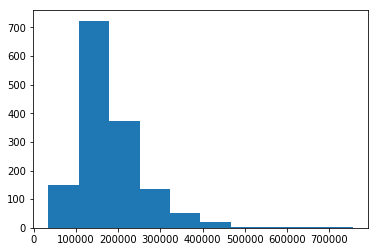

In [7]:
plt.hist(y_train)
plt.show()

Влияние признаков на целевую переменную

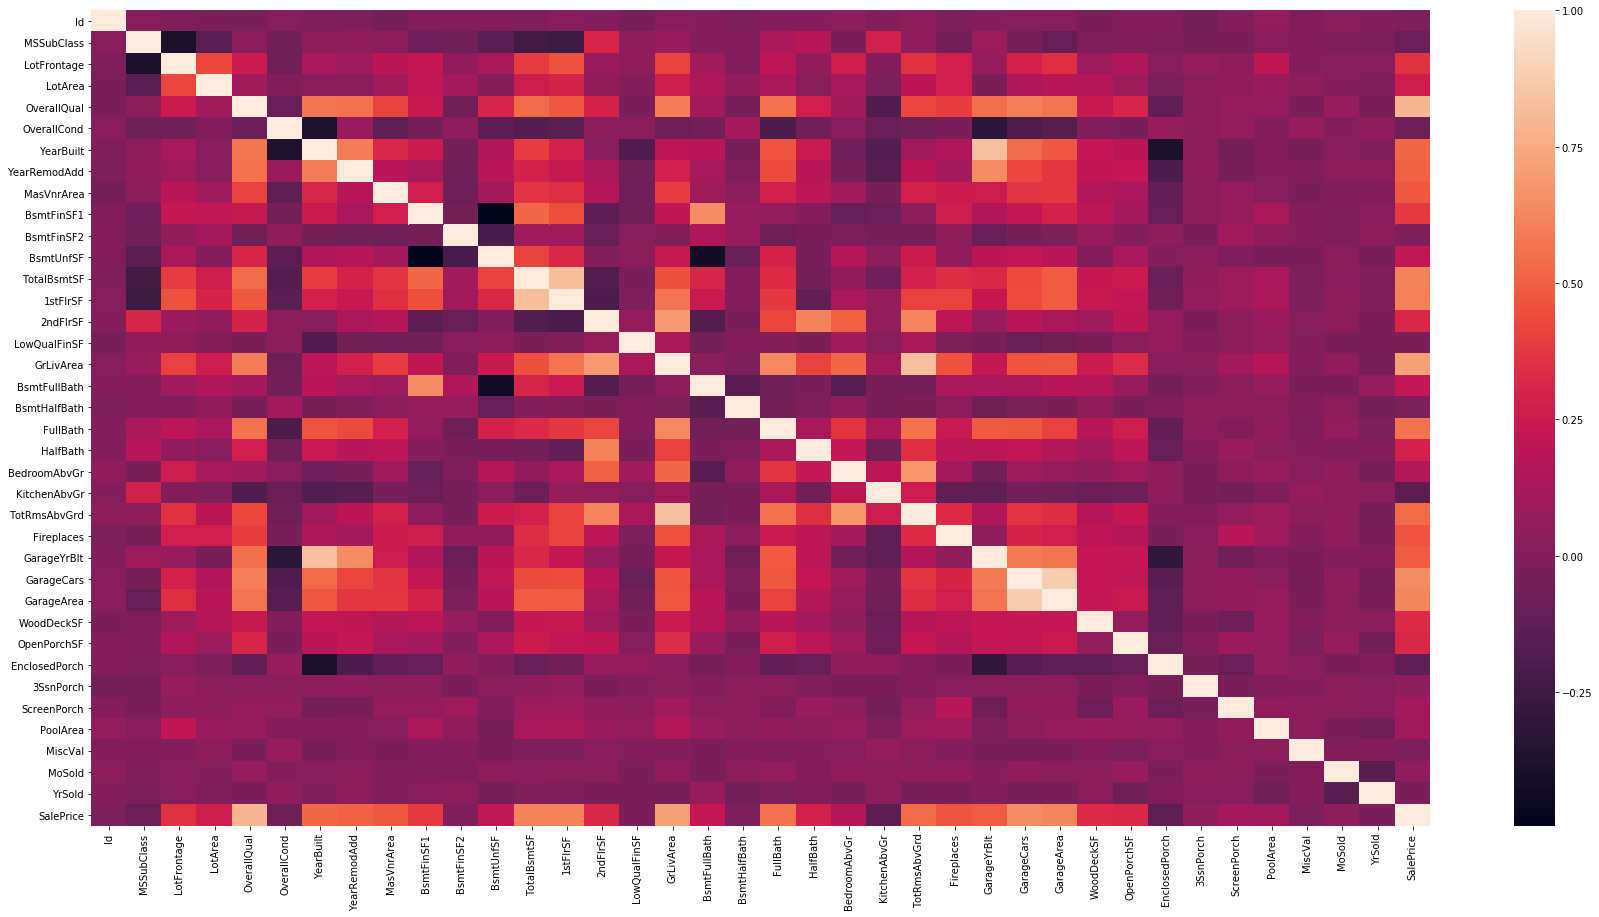

In [8]:
corrmat = train.corr()
f, ax = plt.subplots(figsize=(30, 15))
sns.heatmap(corrmat);

Наименее влиятельные признаки

In [9]:
salecorr = corrmat["SalePrice"].abs().sort_values()
salecorr = salecorr[salecorr < 0.05]
less_corr = salecorr.index.values
less_corr

array(['BsmtFinSF2', 'BsmtHalfBath', 'MiscVal', 'Id', 'LowQualFinSF',
       'YrSold', '3SsnPorch', 'MoSold'], dtype=object)

ТОП10 признаков

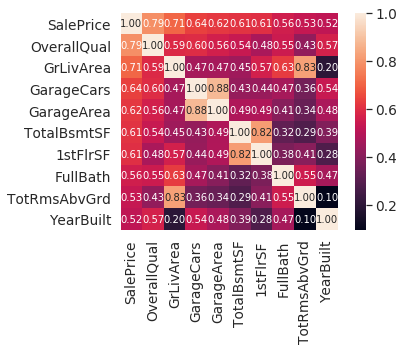

In [10]:
k = 10 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

Стоимость жилья в зависимости от жилой площади

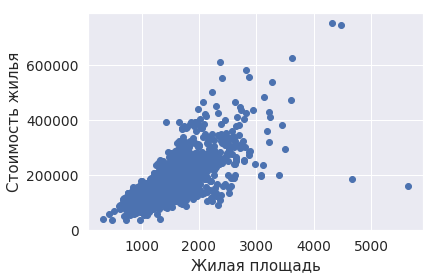

In [14]:
plt.scatter(train['GrLivArea'], y_train )
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость жилья')
plt.show()

Стоимость жилья в зависимости от площади подвала

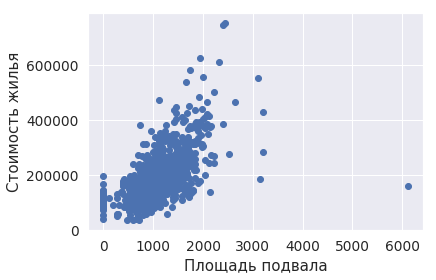

In [15]:
plt.scatter(train['TotalBsmtSF'], y_train )
plt.xlabel('Площадь подвала')
plt.ylabel('Стоимость жилья')
plt.show()

# Подготовка набора данных для обучения

## Утилиты

In [0]:
def clear_data(df):
    # Источник - https://www.kaggle.com/juliencs/a-study-on-regression-applied-to-the-ames-dataset  

    # Заполняем отсутсвующие значения
    # Alley : data description says NA means "no alley access"
    df["Alley"] = df["Alley"].fillna("None")
    # BedroomAbvGr : NA most likely means 0
    df.loc[:, "BedroomAbvGr"] = df.loc[:, "BedroomAbvGr"].fillna(0)
    # BsmtQual etc : data description says NA for basement features is "no basement"
    df.loc[:, "BsmtQual"] = df.loc[:, "BsmtQual"].fillna("No")
    df.loc[:, "BsmtCond"] = df.loc[:, "BsmtCond"].fillna("No")
    df.loc[:, "BsmtExposure"] = df.loc[:, "BsmtExposure"].fillna("No")
    df.loc[:, "BsmtFinType1"] = df.loc[:, "BsmtFinType1"].fillna("No")
    df.loc[:, "BsmtFinType2"] = df.loc[:, "BsmtFinType2"].fillna("No")
    df.loc[:, "BsmtFullBath"] = df.loc[:, "BsmtFullBath"].fillna(0)
    df.loc[:, "BsmtHalfBath"] = df.loc[:, "BsmtHalfBath"].fillna(0)
    df.loc[:, "BsmtUnfSF"] = df.loc[:, "BsmtUnfSF"].fillna(0)
    # CentralAir : NA most likely means No
    df.loc[:, "CentralAir"] = df.loc[:, "CentralAir"].fillna("N")
    # Condition : NA most likely means Normal
    df.loc[:, "Condition1"] = df.loc[:, "Condition1"].fillna("Norm")
    df.loc[:, "Condition2"] = df.loc[:, "Condition2"].fillna("Norm")
    # EnclosedPorch : NA most likely means no enclosed porch
    df.loc[:, "EnclosedPorch"] = df.loc[:, "EnclosedPorch"].fillna(0)
    # External stuff : NA most likely means average
    df.loc[:, "ExterCond"] = df.loc[:, "ExterCond"].fillna("TA")
    df.loc[:, "ExterQual"] = df.loc[:, "ExterQual"].fillna("TA")
    # Fence : data description says NA means "no fence"
    df.loc[:, "Fence"] = df.loc[:, "Fence"].fillna("No")
    # FireplaceQu : data description says NA means "no fireplace"
    df.loc[:, "FireplaceQu"] = df.loc[:, "FireplaceQu"].fillna("No")
    df.loc[:, "Fireplaces"] = df.loc[:, "Fireplaces"].fillna(0)
    # Functional : data description says NA means typical
    df.loc[:, "Functional"] = df.loc[:, "Functional"].fillna("Typ")
    # GarageType etc : data description says NA for garage features is "no garage"
    df.loc[:, "GarageType"] = df.loc[:, "GarageType"].fillna("No")
    df.loc[:, "GarageFinish"] = df.loc[:, "GarageFinish"].fillna("No")
    df.loc[:, "GarageQual"] = df.loc[:, "GarageQual"].fillna("No")
    df.loc[:, "GarageCond"] = df.loc[:, "GarageCond"].fillna("No")
    df.loc[:, "GarageArea"] = df.loc[:, "GarageArea"].fillna(0)
    df.loc[:, "GarageCars"] = df.loc[:, "GarageCars"].fillna(0)
    # HalfBath : NA most likely means no half baths above grade
    df.loc[:, "HalfBath"] = df.loc[:, "HalfBath"].fillna(0)
    # HeatingQC : NA most likely means typical
    df.loc[:, "HeatingQC"] = df.loc[:, "HeatingQC"].fillna("TA")
    # KitchenAbvGr : NA most likely means 0
    df.loc[:, "KitchenAbvGr"] = df.loc[:, "KitchenAbvGr"].fillna(0)
    # KitchenQual : NA most likely means typical
    df.loc[:, "KitchenQual"] = df.loc[:, "KitchenQual"].fillna("TA")
    # LotFrontage : NA most likely means no lot frontage
    df.loc[:, "LotFrontage"] = df.loc[:, "LotFrontage"].fillna(0)
    # LotShape : NA most likely means regular
    df.loc[:, "LotShape"] = df.loc[:, "LotShape"].fillna("Reg")
    # MasVnrType : NA most likely means no veneer
    df.loc[:, "MasVnrType"] = df.loc[:, "MasVnrType"].fillna("None")
    df.loc[:, "MasVnrArea"] = df.loc[:, "MasVnrArea"].fillna(0)
    # MiscFeature : data description says NA means "no misc feature"
    df.loc[:, "MiscFeature"] = df.loc[:, "MiscFeature"].fillna("No")
    df.loc[:, "MiscVal"] = df.loc[:, "MiscVal"].fillna(0)
    # OpenPorchSF : NA most likely means no open porch
    df.loc[:, "OpenPorchSF"] = df.loc[:, "OpenPorchSF"].fillna(0)
    # PavedDrive : NA most likely means not paved
    df.loc[:, "PavedDrive"] = df.loc[:, "PavedDrive"].fillna("N")
    # PoolQC : data description says NA means "no pool"
    df.loc[:, "PoolQC"] = df.loc[:, "PoolQC"].fillna("No")
    df.loc[:, "PoolArea"] = df.loc[:, "PoolArea"].fillna(0)
    # SaleCondition : NA most likely means normal sale
    df.loc[:, "SaleCondition"] = df.loc[:, "SaleCondition"].fillna("Normal")
    # ScreenPorch : NA most likely means no screen porch
    df.loc[:, "ScreenPorch"] = df.loc[:, "ScreenPorch"].fillna(0)
    # TotRmsAbvGrd : NA most likely means 0
    df.loc[:, "TotRmsAbvGrd"] = df.loc[:, "TotRmsAbvGrd"].fillna(0)
    # Utilities : NA most likely means all public utilities
    df.loc[:, "Utilities"] = df.loc[:, "Utilities"].fillna("AllPub")
    # WoodDeckSF : NA most likely means no wood deck
    df.loc[:, "WoodDeckSF"] = df.loc[:, "WoodDeckSF"].fillna(0)
    
    # Представляем некоторые категориальные значения в виде числовых
    # если есть информация о порядке
    df = df.replace({"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"No" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"No" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"No" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"No" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2},
                       "Utilities" : {"ELO" : 1, "NoSeWa" : 2, "NoSewr" : 3, "AllPub" : 4}}
                     )    
    
    # Некоторые числовые переменные на самом деле категориальные
    df = df.replace({"MSSubClass" : {20 : "SC20", 30 : "SC30", 40 : "SC40", 45 : "SC45", 
                                       50 : "SC50", 60 : "SC60", 70 : "SC70", 75 : "SC75", 
                                       80 : "SC80", 85 : "SC85", 90 : "SC90", 120 : "SC120", 
                                       150 : "SC150", 160 : "SC160", 180 : "SC180", 190 : "SC190"},
                       "MoSold" : {1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "Jun",
                                   7 : "Jul", 8 : "Aug", 9 : "Sep", 10 : "Oct", 11 : "Nov", 12 : "Dec"}
                      })
    
    return df

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

## Очистка данных

In [12]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Удаление колонок с наименьшей корреляцией

In [15]:
train = clear_data(train)
train.drop(less_corr, axis=1, inplace=True)

TypeError: ignored

Удаление SalePrice

In [0]:
train.drop("SalePrice", axis=1, inplace=True)

In [26]:
train.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'BsmtFullBath',
       'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'Sc

## Разделяем числовые и категориальные признаки

In [0]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns

train_numerical = train[numerical_features]
train_categorical = train[categorical_features]

In [29]:
print("Categorical features:\n", categorical_features)
print("\n\nNumerical features:\n", numerical_features)

Categorical features:
 Index(['MSSubClass', 'MSZoning', 'LandContour', 'LotConfig', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation',
       'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish',
       'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'],
      dtype='object')


Numerical features:
 Index(['LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'Utilities',
       'LandSlope', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtUnfSF', 'TotalBsmtSF', 'HeatingQC', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'FireplaceQu', 'GarageYrBlt', 'Gar

## Предварительная обработка числовых признаков

Заполняем пустые значения средними значениями

In [31]:
# Количество пустых значений числовых признаков
print("Empty numbers before processing: ", train_numerical.isnull().values.sum())
# Заполняем пустые значения средними значениями
train_numerical = train_numerical.fillna(train_numerical.median())
 
# Проверяем количество пустых значений числовых признаков
print("Empty numbers after processing: ", train_numerical.isnull().values.sum())

Empty numbers before processing:  81
Empty numbers after processing:  0


Нормализуем числовые признаки

In [0]:
# Среднее значение
mean = train_numerical.mean(axis=0)
# Стандартное отклонение
std = train_numerical.std(axis=0)
train_numerical -= mean
train_numerical /= std

In [43]:
train_numerical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 48 columns):
LotFrontage      1460 non-null float64
LotArea          1460 non-null float64
Street           1460 non-null float64
Alley            1460 non-null float64
LotShape         1460 non-null float64
Utilities        1460 non-null float64
LandSlope        1460 non-null float64
OverallQual      1460 non-null float64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null float64
YearRemodAdd     1460 non-null float64
MasVnrArea       1460 non-null float64
ExterQual        1460 non-null float64
ExterCond        1460 non-null float64
BsmtQual         1460 non-null float64
BsmtCond         1460 non-null float64
BsmtExposure     1460 non-null float64
BsmtFinType1     1460 non-null float64
BsmtFinSF1       1460 non-null float64
BsmtFinType2     1460 non-null float64
BsmtUnfSF        1460 non-null float64
TotalBsmtSF      1460 non-null float64
HeatingQC        1460 non-null floa

## Предварительная обработка категориальных значений

In [36]:
train_categorical.head()

,MSSubClass_SC120,MSSubClass_SC160,MSSubClass_SC180,MSSubClass_SC190,MSSubClass_SC20,MSSubClass_SC30,MSSubClass_SC40,MSSubClass_SC45,MSSubClass_SC50,MSSubClass_SC60,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,1,0


In [0]:
# Преобразование в OHE
train_categorical = pd.get_dummies(train_categorical)

In [38]:
train_categorical.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 188 entries, MSSubClass_SC120 to SaleCondition_Partial
dtypes: uint8(188)
memory usage: 268.1 KB


Проверяем количество пустых значений категориальных признаков

In [39]:
train_categorical.isnull().values.sum()

0

## Готовим общий набор данных

In [0]:
x_train = pd.concat([train_numerical, train_categorical], axis = 1)

In [45]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 236 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(48), uint8(188)
memory usage: 815.6 KB


In [119]:
x_train[:5]

,LotFrontage,LotArea,Alley,LotShape,LandSlope,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,0,4,3,7,5,2003,2003,196.0,...,0,0,0,1,0,0,0,0,1,0
1,80.0,9600,0,4,3,6,8,1976,1976,0.0,...,0,0,0,1,0,0,0,0,1,0
2,68.0,11250,0,3,3,7,5,2001,2002,162.0,...,0,0,0,1,0,0,0,0,1,0
3,60.0,9550,0,3,3,7,5,1915,1970,0.0,...,0,0,0,1,1,0,0,0,0,0
4,84.0,14260,0,3,3,8,5,2000,2000,350.0,...,0,0,0,1,0,0,0,0,1,0


# Нейронная сеть

In [46]:
model = Sequential()
model.add(Dense(200, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(25, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()

model.compile(optimizer='adadelta', loss='mse', metrics=['mae'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=100, 
                    validation_split=0.1, 
                    verbose=2)

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 200)               47400     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               20100     
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_3 (Dense)              (None, 25)                1275      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 26        
Total params: 73,851
Trainable params: 73,851
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 1314 samp

# Предсказание

## Готовим данные для предсказания

In [51]:
test = pd.read_csv('test.csv')

test = clear_data(test)

# test.drop(less_corr, axis=1, inplace=True)
# test.drop("SalesPrice")

test_numerical = test[numerical_features]
test_categorical = test[categorical_features]

# Подготовка числовых признаков
test_numerical = test_numerical.fillna(test_numerical.median())
test_numerical -= mean
test_numerical /= std

# Подготовка категориальных признаков
test_categorical = pd.get_dummies(test_categorical)
additional_columns = []
for column in train_categorical.columns:
    if column not in test_categorical.columns:
        additional_columns.append(column)
        test_categorical[column] = 0
        
# Объединение
x_test = pd.concat([test_numerical[train_numerical.columns], test_categorical[train_categorical.columns]], axis = 1)

x_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Columns: 236 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(48), int64(15), uint8(173)
memory usage: 964.7 KB


## Запускаем предсказание

In [0]:
predictions = model.predict(x_test)

In [53]:
predictions[:20]

array([[117001.8 ],
       [161431.88],
       [181307.66],
       [193368.2 ],
       [197859.53],
       [174782.23],
       [175690.9 ],
       [167264.23],
       [184389.9 ],
       [131281.38],
       [179505.64],
       [ 97359.22],
       [ 97517.34],
       [143972.53],
       [117616.05],
       [356691.94],
       [250546.23],
       [286398.4 ],
       [280197.6 ],
       [475068.12]], dtype=float32)

# Подготовка решения для Kaggle

## Готовим решение для Kaggle

In [0]:
out = np.column_stack((test['Id'], predictions))

In [55]:
out[:10]

array([[  1461.      , 117001.796875],
       [  1462.      , 161431.875   ],
       [  1463.      , 181307.65625 ],
       [  1464.      , 193368.203125],
       [  1465.      , 197859.53125 ],
       [  1466.      , 174782.234375],
       [  1467.      , 175690.90625 ],
       [  1468.      , 167264.234375],
       [  1469.      , 184389.90625 ],
       [  1470.      , 131281.375   ]])

In [0]:
np.savetxt('submission.csv', out, header="Id,SalePrice", 
            comments="", fmt="%d,%f")

In [57]:
!head submission.csv

Id,SalePrice
1461,117001.796875
1462,161431.875000
1463,181307.656250
1464,193368.203125
1465,197859.531250
1466,174782.234375
1467,175690.906250
1468,167264.234375
1469,184389.906250


## Отправляем решение на Kaggle

In [58]:
!kaggle competitions submit -c house-prices-advanced-regression-techniques -m "Removed less correlated" -f submission.csv

100% 27.0k/27.0k [00:03<00:00, 8.71kB/s]
Successfully submitted to House Prices: Advanced Regression Techniques